Agricultural Land Classification data for England can be downloaded here https://data.gov.uk/dataset/952421ec-da63-4569-817d-4d6399df40a1/provisional-agricultural-land-classification-alc 

Leave the 'Full dataset' toggle checked and choose your favourite format. 

Here we use gdb guessing which one will be best... I have no idea.. 

When you click on the big down arrow, you should get a file called NE_AgriculturalLandClassificationProvisionalEngland_FGDB_Full.zip 

Unzip this, and you'll have a lot of files. The one you need is ?? tbc??!

In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
border_file = '../../data/land/border_lines_GB.gpkg' 
alc_file = '../../data/land/NE_AgriculturalLandClassificationProvisionalEngland_FGDB/data.gdb/'

In [3]:
yorkshire_index = 66
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
polygon = counties['geometry'].iloc[yorkshire_index]
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((422004.502 199086.601, 422030...."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((460619.899 235588.003, 460625...."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((499772.602 215220.503, 499795...."
3,Herefordshire,Historic County,"MULTIPOLYGON (((335069.501 272770.499, 335082...."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((424473.304 224921.896, 424502...."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((456472.501 274014.303, 456299...."
91,Dorset,Historic County,"MULTIPOLYGON (((333203.198 91375.703, 333185.9..."
92,Devon,Historic County,"MULTIPOLYGON (((333223.945 91353.145, 333218.0..."
93,Banffshire,Historic County,"MULTIPOLYGON (((349516.703 868874.397, 349519...."


In [4]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [5]:
alc = gpd.read_file(alc_file, mask = polygon)

In [6]:
# Make sure both maps are using the same coordinate system
counties = counties.to_crs(epsg=4326)
alc = alc.to_crs(epsg=4326)


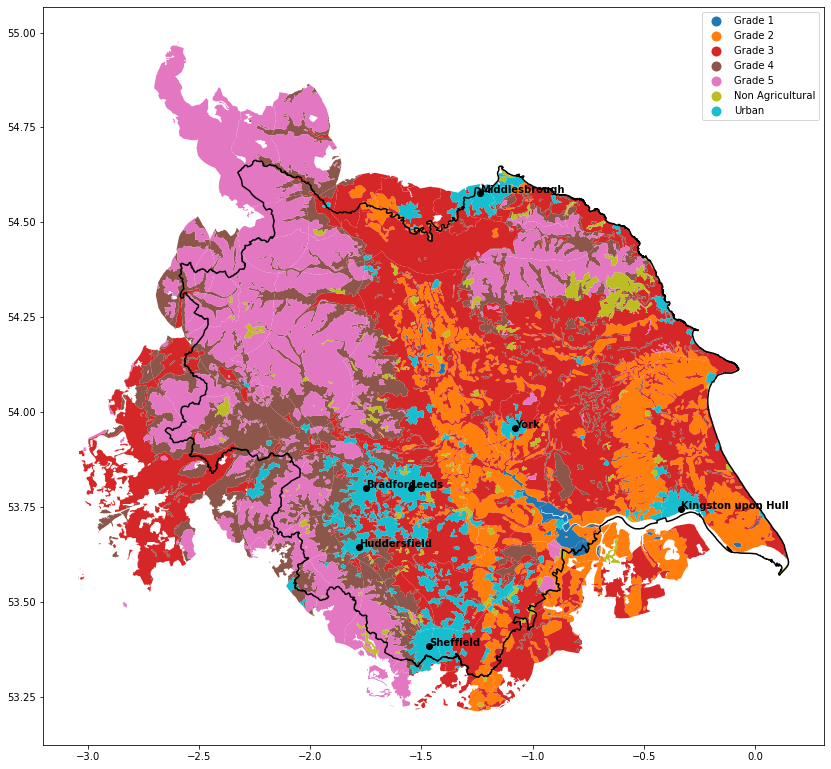

In [7]:
# Plot county boundary and crop polygons on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county
ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc.plot('alc_grade', ax=ax_base, legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);
